In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2

In [3]:
import matplotlib.pyplot as plt
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model ="frozen_inference_graph.pb"

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabels =[] ## empty list of python
file_name = 'labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    #classLabels.append(fpt.read())

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ## 255/2
model.setInputMean((127.5,127.5,127.5)) ##mobilenet => [-1,1]
model.setInputSwapRB(True)

<dnn_Model 0x7fc1e836eb30>

# Read an image

In [9]:
img=cv2.imread('cq5dam.resized.img.1680.large.time1550745968664.jpg')

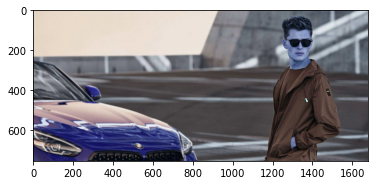

In [10]:
plt.imshow(img)

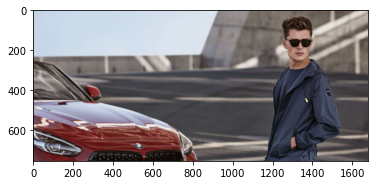

In [11]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [12]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)
print(ClassIndex)

[ 1 77  3]


In [13]:
font_scale =3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    #cv2.rectangle(frame, (x,y),(x+w,y+h),(255,0,0),2)
    #cv.putText(img,text,(text_offset_x,text_offset_y)font,fontScale = font_scale, color=(0,0,0),thickness=1)
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

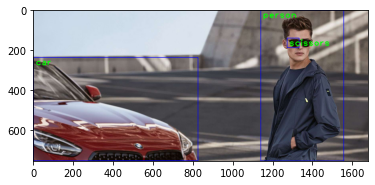

In [14]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

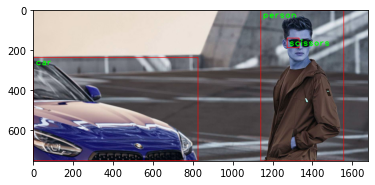

In [15]:
plt.imshow(img)

# Video File

cap = cv2.VideoCapture('Pexels Videos 2103099.mp4')

#check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot open video')
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    ClassIndex, confidence, bbox = model.detect(frame,confThreshold = 0.55)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame, boxes, (255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale = font_scale, color = (0,255,0),thickness =3)
                
    cv2.imshow('Object Detection', frame)
                
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destoryAllWindows()
        

# Webcam

In [ ]:
cap = cv2.VideoCapture(1)

#check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot open webcam')
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    ClassIndex, confidence, bbox = model.detect(frame,confThreshold = .50)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame, boxes, (255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale = font_scale, color = (0,255,0),thickness =3)
                
    cv2.imshow('Object Detection', frame)
                
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destoryAllWindows()

()
[1 1 1]
[1 1 1]
[1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1]
[1 1]
[1 1 1]
[1 1 1]
[1 1 1 1]
[1 1 1]
[1 1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[ 1  1  1 88]
[ 1  1  1 88]
[ 1  1  1 88]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1 1]
[1 1 1]
[1 1 1 1]
[1 1 1]
[1 1 1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1 1]
[1 1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1]
[17  1]
[ 1 31]
[1]
[ 1 33]
[1]
[1]
[ 1 61  1]
[1 1]
[1 1]
[1 1 1 1 1]
[ 1  1 77  1  1]
[ 1 77  1  1]
[1 1 1]
[ 1 77  1  1]
[ 1  1  1 75]
[1]
[1 1]
[1 1 1]
[1 1]
[1 1 1]
[ 1  1 62  1]
[1 1 1]
[1 1 1 1]
[1 1 1]
[1 1 1]
[1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1]
[ 1  1 62]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[ 1  1  1 62]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[ 1  1 61]
[1 1]
[1 1]
[1 1]
[1 1 1]
[1 1]
[1 1]
[1 1]
[1 1]

[27  1  1  1]
[ 1  1  1 27]
[1 1 1]
[ 1  1  1 27]
[1 1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[ 1  1 27 27]
[1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 32]
[ 1 32]
[1]
[1]
[1]
[1]
[17  1]
[ 1 18]
[32  1]
[ 1 32  1]
[ 1 88  1]
[1 1]
[1 1]
[1]
[1 1]
[1 1 1]
[1 1]
[1]
[1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1 1]
[1 1 1]
[ 1  1  1  1 42  1]
[1 1]
[1 1]
[1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1 1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1 1]
[1 1]
[1 1 1]
[1 1 1 1]
[1 1 1]
[1 1 1 1]
[1 1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[ 1  1 73]
[ 1  1 73  1  1]
[1 1 1]
[1 1]
[ 1  1  1 73]
[ 1  1 73  1]
[ 1  1 73]
[ 1  1 73]
[1 1]
[1 1]
[1 1 1 1]
[1 1 1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1 1]
[1 1 1]
[1 1]
[1 1 1]
[1 1]
[1 1 1]
[ 1  1  1 32  1 63]
[ 1  1 63 32]
[ 1  1 32]
[1 1]
[1 1 1]
[ 1  1 63]
[1 1]
[1 1]
[ 1  1 63]
[ 1  1 63]
[1 1]
[1 1]
[1 1]
[1 1]
[ 1  1 73]
[ 1  1 73]
[ 1  1  1 42]
[1 1 1]
[ 1  1 42  1]
[ 1  1 42  1]
[ 1  1 42  1  1]
[1 1 1 1 1]
[1 

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 15]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[17 17]
[1]
[17  1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
()
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1 1]
[15]
()
()
[1]
()
[7]
()
()
()
()
[1]
()
()
()
()
[1]
()
[82]
[82]
[82 49 49]
[49]
[17]
[82]
[82]
[1]
[1]
[1]
[1]
[ 1 72 77]
[77  1]
[77  1]
[1]
[72]
()
()
()
()
()
[1]
[1]
()
[1]
[ 1 32  1]
[1]
[ 1 32  1]
[1]
[1]
[1]
[49]
[ 1 49]
[1]
[1]
[17]
[ 1 17 49]
[1]
[49  1]
[49 49]
[49 49]
()
()
[49 49]
()
[49 49]
()
()
[49]
[49]
()
[49]
()
()
()
[49 50 49]
[49 49]
()
[49]
()
[49 50]
()
()
[49]
[50]
()
()
()
()
[49 49 50]
()
()
()
()
()
()
()
()
[49 49]
()
[49]
[49 49]
[49 49 49 49]
[

[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[ 1  1  1 46 46]
[1 1 1]
[1 1 1]
[ 1  1  1  1 46 46  1]
[1 1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1 1]
[ 1  1  1  1 46]
[1 1 1]
[1 1 1]
[1 1 1]
[ 1  1  1 82]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[ 1  1  1 82]
[ 1  1 82  1]
[1 1 1]
[ 1  1 82  1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[ 1  1 82  1  1]
[ 1  1  1 82]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1 1]
[ 1  1  1 82]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[ 1 82  1  1  1]
[ 1  1 82  1  1  1  1]
[1 1 1 1]
[ 1  1  1 82]
[ 1  1  1  1  1 82]
[1 1 1 1]
[1 1 1]
[ 1  1  1  1 82 82]
[ 1  1  1 82 82  1]
[ 1 82 82  1  1]
[ 1 82  1 82  1]
[ 1  1 82  1  1  1  1]
[ 1  1 82  1  1]
[ 1  1 82 82  1  1]
[ 1 82  1 82 82  1  1]
[ 1  1 82 82 82  1  1  1  1 82]
[ 1  1 82  1]
[ 1 82  1 82  1  1 82]
[ 1  1 82  1  1]
[ 1  1 82  1]
[ 1  1 82  1  1]
[ 1 82  1  1  1 82 82]
[82  1  1  1 82  1  1  1  1]
[82  1 82  1  1]
[ 1  1 82  1  1  1]
[ 1 82  1  1  1

[1 1 1 1]
[1 1 1]
[1]
[1]
[ 1 18  1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1]
[1 1]
[1]
[1]
[1]
()
[1]
[1]
[1]
[ 1 73]
[1 1]
[1 1]
[1]
[1]
[1]
[1]
()
()
[1 1]
[1 1]
[1 1]
[1]
[1]
[1]
[1 1]
[1 1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 3]
[1 1]
()
[1]
[1]
[1]
[1]
[1]
[1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 39]
[ 1 39]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 39]
[ 1 39]
[1]
[1]
[ 1 39]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[1]
[ 1 62 47]
[ 1 62]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[ 1 62]
[1 1]
[1 1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 39]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1]
[1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


[1]
[1]
[1 1]
[1]
[1]
[1]
[ 1 18 21]
[1]
[1 1]
[1]
[1 1]
[1]
[1]
[1]
[ 1 10]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[ 1 64]
[1]
[1]
[1]
[1]
[1 1]
[ 1 18 88 16]
[ 1 21 64]
[ 1 64 21  1]
[1 1]
[1]
[ 1 41  1 41]
[ 1 18]
[1]
()
[ 1  1 11]
[1 1 1]
[1 1 1 1]
[1 1]
[1 1 1]
[1]
[ 1 18  1]
[1]
()
()
[15]
[1 1]
[1 1 1]
[ 1 15  1]
[1]
()
[ 1 15  1]
[15]
[23]
[23  3]
[23 11]
[23 11]
[23 11]
[23]
[88 23]
[88 23  1  1]
()
[15]
[15 15  1 15]
[15 15 15 15  1]
[15 15]
[15 15 23 15]
[15 15 23 15]
[15  3  3 23]
[15  1]
[ 1 18]
[1 1]
[23  1  1  1]
[ 1  1  1 15]
[1 1 1]
[ 1  1  1 10]
[ 1 21]
[1 1 1 1]
[15 15]
[15]
[ 1 15  1]
[ 1 15]
[1 1]
[ 1 15  1]
[15  1]
[ 1  1  1 41]
[1 1 1]
[15 15  1  1  1 15  1 15  1  1]
[15  1 15 15 21 15 15]
[15  1  1 15  1  1 15]
[15  1  1  1  1 15 21]
[ 1  1 16  1  1 15]
[15  1 15  1  1 15  1]
[ 1 15  1 16 15  1  1 15]
[15  1  1 16]
[15  1]
[15  1]
[1]
[1]
[ 1 62]
[1]
[ 1 15 18]
[ 1 15]
[ 1 62]
[1]
[1]
[1]
[ 1 18]
[1]
[ 1 18]
[34  1 18]
[ 1 17 34]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 39]
[1]

[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[ 1  1 15]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1 1]
[1 1]
[1 1]
[1]
[1]
[1]
[1]
[ 1 21]
[21  1]
[21  1]
[21  1 18  1]
[21  1]
[1]
[18  1 18]
[16  1 18]
[ 1 21]
[21  1]
[21  1]
[ 1 21]
[ 1 21]
[ 1 16 15]
[ 1 21]
[ 1 21]
[21  1]
[1]
[ 1 15 15]
[ 1 15 18]
[ 1 15]
[1]
[ 1 15]
[ 1 15]
[1]
[ 1 62 62]
[ 1 62]
[ 1 18]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 21]
[1]
[ 1 21]
[ 1 21]
[ 1 21]
[ 1 21]
[ 1 21]
[ 1 21]
[1]
[16  1]
[16  1 16]
[16  1]
[16  1]
[16  1 18 18]
[18  1 18]
[18  1 21]
[18  1 18]
[18  1 18]
[18  1 15 18]
[18  1 18]
[18  1]
[18  1]
[18  1]
[18  1 15]
[ 1 21 18]
[ 1 18 15]
[ 1 15]
[ 1 21]
[ 1 15 18]
[ 1 15]
[1]
[1]
[ 1 15]
[1]
[1]
[1]
[1 1]
[ 1 15]
[ 1 15 15]
[15 15  1]
[ 1 15 15]
[15  1 15]
[15 15  1]
[15  1 15]
[15  1 15]
[ 1 15 15]
[15  1 15]
[ 1 15 15]
[ 1 15 15]
[ 1 15]
[ 1 15 15]
[ 1 15 15]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 64]
[1]
[1]
[ 1 64]
[1]
[1]
[1]
[1]
[1 1 1

[64 64]
[64]
[64]
[64]
()
()
()
()
()
()
()
()
()
[13]
[7]
[10]
[10 13]
[13]
[13]
[13]
()
[13]
()
()
()
()
()
()
()
()
()
()
()
()
()
()
[10]
()
()
()
()
()
()
[10]
()
()
()
()
()
()
()
[10]
()
()
()
()
()
()
()
()
()
()
()
()
()
[13]
[13]
()
[13]
()
[10]
()
()
()
()
[13]
[10]
()
()
[13 10]
[13 10]
[10 13]
[13 10]
[13 10]
[10 13]
[13 10]
[13 10]
[13]
[13]
[13 10]
[13 10]
[13 10]
[13 10]
[13 10]
[13 10]
[13 10]
[13]
[13]
[13]
[13 10]
[13 10]
[13]
[13 10]
[13]
[13]
[13]
[13 10]
[13 10]
[13 10]
[13 10]
[13 10]
[13 10]
[13]
[13]
[13 10]
[13 10]
[13 10]
[13 10]
[13]
[13 10]
[13]
[10]
()
()
[10]
()
[10]
()
[10]
()
[64]
[64]
[64 33 64]
[64 33]
[64 64]
[64 64]
[64]
[64 33]
()
[64]
()
[64 17]
[1]
[1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 64]
[1]
[1]
[ 1 64]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1]
[1]
[1]
[1]
[1 1]
[1 1]
[1 1]
[1 1 1]
[1 1]
[1 1]
[1 1 1]
[1 1]
[1 1]
[1 1]
[1]
[1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1]
[1]
[1]